[home](https://nils-holmberg.github.io/sfac-py/web/210927-sci/)

# day 1: getting started with python
- overview of day 1
- **mindset: excel on steroids**
<img src="../../fig/Microsoft_Office_Excel_2019_present.svg.png" width="100"/>

## section 1.3.1: tables
- **mindset: excel on steroids**
- file system, folders, csv files
- checking, cleaning, summarizing 
- sql-like operations on datasets
- combination of numeric and text 
- intro to day 2, nlp and spacy


In [1]:
import pandas as pd
import seaborn as sns

# df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.to_csv("csv/iris.csv", sep="\t", header=True, index=False)

In [3]:
# file path on google colab
fp = '/content/iris.csv'
# file path relative to local working dir
fp = '../../csv/iris.csv'

df = pd.read_csv(fp, sep="\t", header=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Instructor notes

*Estimated teaching time:* 30 min

*Estimated challenge time:* 30 min

*Key questions:*

  - "How can I import data in Python ?"
  - "What is Pandas ?"
  - "Why should I use Pandas to work with data ?"
    
*Learning objectives:*

  - "Navigate the workshop directory and download a dataset."
  - "Explain what a library is and what libraries are used for."
  - "Describe what the Python Data Analysis Library (Pandas) is."
  - "Load the Python Data Analysis Library (Pandas)."
  - "Use `read_csv` to read tabular data into Python."
  - "Describe what a DataFrame is in Python."
  - "Access and summarize data stored in a DataFrame."
  - "Define indexing as it relates to data structures."
  - "Perform basic mathematical operations and summary statistics on data in a Pandas DataFrame."
  - "Create simple plots."

### Automating data analysis tasks in Python

We can automate the process of performing data manipulations in Python. It's efficient to spend time
building the code to perform these tasks because once it's built, we can use it
over and over on different datasets that use a similar format. This makes our
methods easily reproducible. We can also easily share our code with colleagues
and they can replicate the same analysis.

### The Dataset

For this lesson, we will be using the Portal Teaching data, a subset of the data
from Ernst et al
[Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm)

We will be using this dataset, which can be downloaded here: [surveys.csv](tmp/surveys.csv) ... but **don't click** to download it in your browser - **we are going to use Python !**

In [1]:
import urllib.request

# You can also get this URL value by right-clicking the `surveys.csv` link above and selecting "Copy Link Address"
url = 'https://raw.githubusercontent.com/nils-holmberg/sfac-py/main/csv/surveys.csv'

# save file
urllib.request.urlretrieve(url, 'tmp/surveys.csv')

('tmp/surveys.csv', <http.client.HTTPMessage at 0x7f30e46e9cd0>)

If Jupyter is running locally on your computer, you'll now have a file `surveys.csv` in the current working directory.
You can check by clicking on `File` tab on the top left of the notebook to see if the file exists. If you are running Jupyter on a remote server or cloud service (eg Colaboratory or Azure Notebooks), the file will be there instead.

We are studying the species and weight of animals caught in plots in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| site_id          | ID of a particular plot            |
| species_id       | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| hindfoot_length  | length of the hindfoot in mm       |
| weight           | weight of the animal in grams      |


The first few rows of our file look like this:

```
record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
5,7,16,1977,3,DM,M,35,
6,7,16,1977,1,PF,M,14,
7,7,16,1977,2,PE,F,,
8,7,16,1977,1,DM,M,37,
9,7,16,1977,1,DM,F,34,
```

---

## About Libraries

A library in Python contains a set of tools (called functions) that perform
tasks on our data. Importing a library is like getting a piece of lab equipment
out of a storage locker and setting it up on the bench for use in a project.
Once a library is set up, it can be used or called to perform many tasks.

If you have noticed in the previous code `import urllib.request`, we are calling 
a **request** function from library **urllib** to download our dataset from web.



## Pandas in Python
The dataset we have, is in table format. One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

First, lets make sure the Pandas and matplotlib packages are **installed**.

In [2]:
#conda install pandas matplotlib

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below.

In [4]:
import pandas as pd

# read data
#df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
#df = pd.read_csv(fp, sep="\t", header=0)


Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.


# Reading CSV Data Using Pandas

We will begin by locating and reading our survey data which are in CSV format. CSV stands for Comma-Separated Values and is a common way store formatted data. Other symbols my also be used, so you might see tab-separated, colon-separated or space separated files. It is quite easy to replace one separator with another, to match your application. The first line in the file often has headers to explain what is in each column. CSV (and other separators) make it easy to share data, and can be imported and exported from many applications, including Microsoft Excel.

We can use Pandas' `read_csv` function to pull the file directly into a
[DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).



## So What's a DataFrame?

A DataFrame is a 2-dimensional data structure that can store data of different
types (including characters, integers, floating point values, factors and more)
in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in
R. A DataFrame always has an index (0-based). An index refers to the position of
an element in the data structure.



In [7]:
# note that pd.read_csv is available because we imported pandas as pd, and data is available where we saved it
df = pd.read_csv("tmp/surveys.csv")
df.head()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


The above command outputs a `DateFrame` object, which Jupyter displays as a table (snipped in the middle since there are many rows).

We can see that there were 33,549 rows parsed. Each row has 9
columns. The first column is the index of the DataFrame. The index is used to
identify the position of the data, but it is not an actual column of the DataFrame.
It looks like  the `read_csv` function in Pandas  read our file properly. However,
we haven't saved any data to memory so we can work with it.We need to assign the
DataFrame to a variable. Remember that a variable is a name for a value, such as `x`,
or `data`. We can create a new  object with a variable name by assigning a value to it using `=`.

Let's call the imported survey data `surveys_df`:

In [8]:
surveys_df = pd.read_csv("tmp/surveys.csv")

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can view the value of the `surveys_df`
object by typing its name into the cell.

In [9]:
surveys_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0



which prints contents like above.

You can also select just a few rows, so it is easier to fit on one window, you can see that pandas has neatly formatted the data to fit our screen.

Here, we will be using a function called **head**.

The `head()` function displays the first several lines of a file. It is discussed below.


In [10]:
surveys_df.head()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## Exploring Our Species Survey Data

Again, we can use the `type` function to see what kind of thing `surveys_df` is:



In [11]:
type(surveys_df)

pandas.core.frame.DataFrame


As expected, it's a DataFrame (or, to use the full name that Python uses to refer
to it internally, a `pandas.core.frame.DataFrame`).

What kind of things does `surveys_df` contain? DataFrames have an attribute
called `dtypes` that answers this:



In [12]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
site_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a single column have the same type. For example, months have type
`int64`, which is a kind of integer. Cells in the month column cannot have
fractional values, but the weight and hindfoot_length columns can, because they
have type `float64`. The `object` type doesn't have a very helpful name, but in
this case it represents strings (such as 'M' and 'F' in the case of sex).

### Useful Ways to View DataFrame objects in Python

There are many ways to summarize and access the data stored in DataFrames,
using attributes and methods provided by the DataFrame object.

To access an attribute, use the DataFrame object name followed by the attribute
name `df_object.attribute`. Using the DataFrame `surveys_df` and attribute
`columns`, an index of all the column names in the DataFrame can be accessed
with `surveys_df.columns`.

Methods are called in a similar fashion using the syntax `df_object.method()`.
As an example, `surveys_df.head()` gets the first few rows in the DataFrame
`surveys_df` using **the `head()` method**. With a method, we can supply extra
information in the parens to control behaviour.

Let's look at the data using these.

## Challenge - DataFrames

Using our DataFrame `surveys_df`, try out the attributes & methods below to see
what they return.

1. `surveys_df.columns`
2. `surveys_df.shape` Take note of the output of `shape` - what format does it
   return the shape of the DataFrame in?   HINT: [More on tuples, here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).
3. `surveys_df.head()` Also, what does `surveys_df.head(15)` do?
4. `surveys_df.tail()`




## Solution - DataFrames

... try it yourself !

# Calculating Statistics From Data

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many animals were collected in each plot, or how many of each
species were caught. We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data:



In [13]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'site_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Let's get a list of all the species. The `pd.unique` function tells us all of
the unique values in the `species_id` column.

In [14]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

## Challenge - Statistics

1. Create a list of unique site ID's found in the surveys data. Call it
  `site_names`. How many unique sites are there in the data? How many unique
  species are in the data?

2. What is the difference between `len(site_names)` and `surveys_df['site_id'].nunique()`?

## Solution - Statistics

In [15]:
site_names = pd.unique(surveys_df['site_id'])
print(len(site_names), surveys_df['site_id'].nunique())

24 24


# Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to calculate the average
weight of all individuals per site.

We can calculate basic statistics for all records in a single column using the
syntax below:

In [16]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64


We can also extract one specific metric if we wish:



In [17]:
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
# only the last command shows output below - you can try the others above in new cells
surveys_df['weight'].count()

32283


But if we want to summarize by one or more variables, for example sex, we can
use **Pandas' `.groupby` method**. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.



In [18]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')


The **pandas function `describe`** will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. **Note** Pandas'
`describe` function will only return summary values for columns containing
numeric data.



In [21]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()

# Provide the mean for each numeric column by sex
# As above, only the last command shows output below - you can try the others above in new cells
grouped_data.mean()

,record_id,month,day,year,site_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379



The `groupby` command is powerful in that it allows us to quickly generate
summary stats.



## Challenge - Summary Data

1. How many recorded individuals are female `F` and how many male `M`
    - A) 17348 and 15690
    - B) 14894 and 16476
    - C) 15303 and 16879
    - D) 15690 and 17348


2. What happens when you group by two columns using the following syntax and
    then grab mean values:
	- `grouped_data2 = surveys_df.groupby(['site_id','sex'])`
	- `grouped_data2.mean()`


3. Summarize weight values for each site in your data. HINT: you can use the
  following syntax to only create summary statistics for one column in your data
  `by_site['weight'].describe()`



## Solution- Summary Data

In [22]:
## Solution Challenge 1
grouped_data.count()

,record_id,month,day,year,site_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


### Solution - Challenge 2

The mean value for each combination of site and sex is calculated. Remark that the 
mean does not make sense for each variable, so you can specify this column-wise: 
e.g. I want to know the last survey year, median foot-length and mean weight for each site/sex combination:

In [23]:
# Solution- Challenge 3
surveys_df.groupby(['site_id'])['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
site_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


## Did you get #3 right?
 **A Snippet of the Output from part 3 of the challenge looks like:**

```
	site_id
	1     count    1903.000000
	      mean       51.822911
	      std        38.176670
	      min         4.000000
	      25%        30.000000
	      50%        44.000000
	      75%        53.000000
	      max       231.000000
         ...
```



## Quickly Creating Summary Counts in Pandas

Let's next count the number of samples for each species. We can do this in a few
ways, but we'll use `groupby` combined with **a `count()` method**.




In [24]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64



Or, we can also count just the rows that have the species "DO":



In [25]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all weight values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.



In [27]:
# Multiply all weight values by 2 but does not change the original weight data
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

## Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.



<AxesSubplot:xlabel='species_id'>

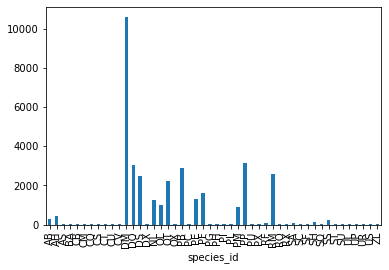

In [28]:
## To make sure figures appear inside Jupyter Notebook
%matplotlib inline

# Create a quick bar chart
species_counts.plot(kind='bar')

#### Animals per site plot

We can also look at how many animals were captured in each site.

<AxesSubplot:xlabel='site_id'>

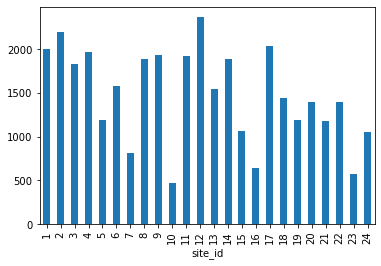

In [29]:
total_count = surveys_df.groupby('site_id')['record_id'].nunique()
# Let's plot that too
total_count.plot(kind='bar')

## _Extra Plotting Challenge_

1. Create a plot of average weight across all species per plot.

2. Create a plot of total males versus total females for the entire dataset.
 
3. Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each plot. Some tips are below to help you solve this challenge:
[For more on Pandas plots, visit this link.](http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot)





### _Solution to Extra Plotting Challenge 1_

<AxesSubplot:xlabel='site_id'>

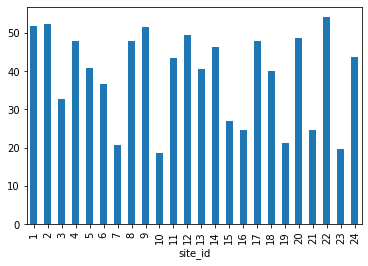

In [30]:
## Solution Plotting Challenge 1
surveys_df.groupby('site_id').mean()["weight"].plot(kind='bar')

### _Solution to Extra Plotting Challenge 2_

<AxesSubplot:xlabel='sex'>

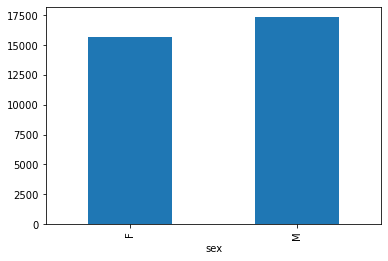

In [31]:
# Solution Plotting Challenge 2
## Create plot of total males versus total females for the entire dataset.

surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')

### _Solution to Extra Plotting Challenge 3_

First we group data by site and by sex, and then calculate a total for each site.

In [32]:
by_site_sex = surveys_df.groupby(['site_id','sex'])
site_sex_count = by_site_sex['weight'].sum()


This calculates the sums of weights for each sex within each plot as a table

```
site  sex
site_id  sex
1        F      38253
         M      59979
2        F      50144
         M      57250
3        F      27251
         M      28253
4        F      39796
         M      49377
<other sites removed for brevity>
```

Below we'll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each plot.



In [33]:
by_site_sex = surveys_df.groupby(['site_id','sex'])
site_sex_count = by_site_sex['weight'].sum()
site_sex_count.unstack()

sex,F,M
site_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Now, create a stacked bar plot with that data where the weights for each sex are stacked by plot.

Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows:

Text(0.5, 0, 'Site')

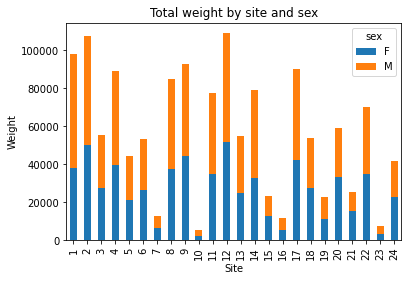

In [34]:
by_site_sex = surveys_df.groupby(['site_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
spc = site_sex_count.unstack()
s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Site")

# Indexing, Slicing and Subsetting

*Estimated teaching time:* 30 min

*Estimated challenge time:* 30 min

*Key questions:*

  - "How can I access specific data within my data set?"
  - "How  can Python and Pandas help me to analyse my data?"
    
*Learning objectives:*

  - Describe what 0-based indexing is.
  - Manipulate and extract data using column headings and index locations.
  - Employ slicing to select sets of data from a DataFrame.
  - Employ label and integer-based indexing to select ranges of data in a dataframe.
  - Reassign values within subsets of a DataFrame.
  - Create a copy of a DataFrame.
  - "Query /select a subset of data using a set of criteria using the following operators: =, !=, >, <, >=, <=."
  - Locate subsets of data using masks.
  - Describe BOOLEAN objects in Python and manipulate data using BOOLEANs.

---

In this lesson, we will explore **ways to access different parts of the data** in a Pandas DataFrame using:

  - Indexing,
  - Slicing, and
  - Subsetting

# Indexing, Slicing and Subsetting


In this lesson, we will explore **ways to access different parts of the data** in a Pandas DataFrame using:

  - Indexing,
  - Slicing, and
  - Subsetting

## Ensure the Pandas package is installed

In [1]:
!pip install pandas matplotlib

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Loading our data

We will continue to use the surveys dataset that we worked with in the last lesson. Let's reopen and read in the data again:



In [2]:
# Make sure pandas is loaded
import pandas as pd

# Read in the survey CSV
surveys_df = pd.read_csv("surveys.csv")

## Indexing and Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (column headings),
numeric ranges, or specific x,y index locations.




## Selecting data using Labels (Column Headings)

We use square brackets `[]` to select a subset of an Python object. For example,
we can select all data from a column named `species_id` from the `surveys_df`
DataFrame by name. There are two ways to do this:



In [3]:
# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id'].head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object

In [4]:
# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id.head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object


We can also create a new object that contains only the data within the
`species_id` column as follows:



In [5]:
# Creates an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']


We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.



In [6]:
# Select the species and plot columns from the DataFrame
surveys_df[['species_id', 'site_id']].head()

,species_id,site_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3



What happens if you ask for a column that doesn't exist?

```python
surveys_df['speciess']
```

Outputs:

```python
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2392             try:
-> 2393                 return self._engine.get_loc(key)
   2394             except KeyError:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5239)()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5085)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20405)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20359)()

KeyError: 'speciess'

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
<ipython-input-7-7d65fa0158b8> in <module>()
      1 
      2 # What happens if you ask for a column that doesn't exist?
----> 3 surveys_df['speciess']
      4 

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py in __getitem__(self, key)
   2060             return self._getitem_multilevel(key)
   2061         else:
-> 2062             return self._getitem_column(key)
   2063 
   2064     def _getitem_column(self, key):

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py in _getitem_column(self, key)
   2067         # get column
   2068         if self.columns.is_unique:
-> 2069             return self._get_item_cache(key)
   2070 
   2071         # duplicate columns & possible reduce dimensionality

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/generic.py in _get_item_cache(self, item)
   1532         res = cache.get(item)
   1533         if res is None:
-> 1534             values = self._data.get(item)
   1535             res = self._box_item_values(item, values)
   1536             cache[item] = res

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/internals.py in get(self, item, fastpath)
   3588 
   3589             if not isnull(item):
-> 3590                 loc = self.items.get_loc(item)
   3591             else:
   3592                 indexer = np.arange(len(self.items))[isnull(self.items)]

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2393                 return self._engine.get_loc(key)
   2394             except KeyError:
-> 2395                 return self._engine.get_loc(self._maybe_cast_indexer(key))
   2396 
   2397         indexer = self.get_indexer([key], method=method, tolerance=tolerance)

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5239)()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5085)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20405)()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20359)()

KeyError: 'speciess'
```

Python tells us what type of error it is in the traceback, at the bottom it says `KeyError: 'speciess'` which means that `speciess` is not a column name (or Key in the related python data type dictionary).

In [7]:
# What happens when you flip the order?
surveys_df[['site_id', 'species_id']].head()

,site_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM


## Extracting Range based Subsets: Slicing

**REMINDER**: Python Uses 0-based Indexing

Let's remind ourselves that Python uses 0-based
indexing. This means that the first element in an object is located at position
0. This is different from other tools like R and Matlab that index elements
within objects starting at 1.



In [8]:
# Create a list of numbers:
a = [1, 2, 3, 4, 5]

![indexing diagram](images/slicing-indexing.svg)
![slicing diagram](images/slicing-slicing.svg)

## Challenge - Extracting data

1. What value does the code **a[0]** return?

2. How about this: **a[5]**

3. In the example above, calling `a[5]` returns an error. Why is that?

4. What about **a[len(a)]** ?




## Solutions - Extracting data

In [9]:
a[0]

1

In [10]:
# Solution #2
# a[5]

#### Solution #2

In above example, the error says `list index out of range`. This means we don't have index 5 in our list. The maximum index for `a` is `4`, as indexing starts at `0`.

In [11]:
# Solution #3
# a[len(a)]

#### Solution - # 4 - Extracting data 
This also gives an error, because len(a) is `5` which is not the maximum index

## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this with our `surveys data`:



In [12]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN



The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

Now lets select the `first 5 rows (rows 0, 1, 2, 3, 4)`.


In [13]:
surveys_df[:5]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [14]:
# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN



We can also reassign values within subsets of our DataFrame.


Let's create a brand new clean dataframe from
the original data CSV file.



In [15]:
surveys_df = pd.read_csv("surveys.csv")

## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc` is primarily *label* based indexing. *Integers* may be used but
  they are interpreted as a *label*.
- `iloc` is primarily *integer* based indexing

To select a subset of rows **and** columns from our DataFrame, we can use the
`iloc` method. For example, we can select month, day and year (columns 2, 3
and 4 if we start counting at 1), like this:

`iloc[row slicing, column slicing]`



In [16]:
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling Python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.

Let's explore some other ways to index and select subsets of data:



In [17]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [18]:
# What does this do?
surveys_df.loc[0, ['species_id', 'site_id', 'weight']]

species_id     NL
site_id         2
weight        NaN
Name: 0, dtype: object

In [19]:
# What happens when you type the code below?
surveys_df.loc[[0, 10, 35549], :]

/Users/perry/.virtualenvs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/perry/.virtualenvs/jupyter/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1.0,7.0,16.0,1977.0,2.0,NL,M,32.0,NaN
10,11.0,7.0,16.0,1977.0,5.0,DS,F,53.0,NaN
35549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**NOTE**: Labels must be found in the DataFrame or you will get a `KeyError`.

Indexing by labels `loc` differs from indexing by integers `iloc`.
With `loc`, the both start bound and the stop bound are **inclusive**. When using
`loc`, integers *can* be used, but the integers refer to the
index label and not the position. For example, using `loc` and select 1:4
will get a different result than using `iloc` to select rows 1:4.

We can also select a specific data value using a row and
column location within the DataFrame and `iloc` indexing:

```python
# Syntax for iloc indexing to finding a specific data element
dat.iloc[row, column]
```

In following iloc example:

In [20]:
surveys_df.iloc[2, 6]

'F'

Remember that Python indexing begins at 0. So, the index location [2, 6]
selects the element that is 3 rows down and 7 columns over in the DataFrame.

## Challenge - Range

1. What happens when you execute:

       - `surveys_df[0:1]`
       - `surveys_df[:4]`
       - `surveys_df[:-1]`

2. What happens when you call:

       - `surveys_df.iloc[0:4, 1:4]`


## Solution - Range

In [21]:
# Solution - Range - #1 (a)
surveys_df[0:1]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [22]:
# Solution - Range - #1 (b)
surveys_df[:4]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [23]:
# Solution - Range - #1 (c)
surveys_df[:-1]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [24]:
# Solution - Range - #2
surveys_df.iloc[0:4, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


## Subsetting Data using Criteria

We can also select a subset of our data using criteria. For example, we can
select all rows that `have a year value of 2002`:



In [25]:
surveys_df[surveys_df.year == 2002].head()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0



Or we can select all rows that `do not contain the year 2002`:



In [26]:
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN



We can define sets of criteria too:



In [27]:
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
2275,2276,1,15,1980,11,DS,M,47.0,132.0
2276,2277,1,15,1980,8,PF,M,15.0,8.0
2277,2278,1,15,1980,9,OT,M,21.0,23.0
2278,2279,1,15,1980,11,DM,F,36.0,36.0
2279,2280,1,15,1980,21,OT,F,20.0,21.0



### Python Syntax Cheat Sheet

Use can use the syntax below when querying data by criteria from a DataFrame.
Experiment with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`




## Challenge - Queries

1. Select a subset of rows in the `surveys_df` DataFrame that contain data from
   the year 1999 and that contain weight values less than or equal to 8. How
   many rows did you end up with? What did your neighbor get?

2. **(Extra)** Use the `isin` function to find all plots that contain `PB` and `PL` species
in the "surveys" DataFrame. How many records contain these values?

You can use the `isin` command in Python to query a DataFrame based upon a
   list of values as follows:

```python
surveys_df[surveys_df['species_id'].isin([listGoesHere])]
```


## Solution - Queries 

In [28]:
## Solution - Queries #1
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0


In [29]:
# when only interested in how many, the sum of True values could be used as well: 
sum((surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8))

5

In [30]:
# Solution - Queries #2
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['site_id'].unique()

array([ 1, 10,  6, 24,  2, 23, 19, 12, 20, 22,  3,  9, 14, 13, 21,  7, 11,
       15,  4, 16, 17,  8, 18,  5])

In [31]:
# To get number of records
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])].shape

(2927, 9)

## Extra Challenges


3. **(Extra)** Create a query that finds all rows with a
   weight value greater than (`>`) or equal to 0.

4. **(Extra)** The `~` symbol in Python can be used to return the OPPOSITE of the
   selection that you specify in Python. It is equivalent to **is not in**.
   Write a query that selects all rows with sex NOT equal to 'M' or 'F' in
   the "surveys" data.

In [32]:
sum(surveys_df["weight"]>=0)

32283

In [33]:
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]


,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN
92,93,8,20,1977,18,DM,NaN,NaN,42.0
105,106,8,20,1977,12,NL,NaN,NaN,NaN
106,107,8,20,1977,18,NL,NaN,NaN,NaN
109,110,8,20,1977,10,DS,NaN,NaN,NaN
120,121,8,21,1977,15,NL,NaN,NaN,NaN


# Using masks to identify a specific condition

A **mask** can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in Python.

Boolean values include `True` or `False`. For example,

In [34]:
# Set x to 5
x = 5

In [35]:
# What does the code below return?
x > 5

False

In [36]:
# How about this?
x == 5

True

## _Extra Challenges - Putting it all together_

 1. Create a new DataFrame that only contains observations with sex values that
   are **not** female or male. Assign each sex value in the new DataFrame to a
   new value of 'x'. Determine the number of null values in the subset.
   
 2. Create a new DataFrame that contains only observations that are of sex male
   or female and where weight values are greater than 0. Create a stacked bar
   plot of average weight by plot with male vs female values stacked for each
   plot.
  3. Count the number of missing values per column. Hint: The method .count() gives you the number of non-NA observations per column. 



## Solution _Extra Challenges_

In [37]:
# Solution extra challenge 1
new = surveys_df[~surveys_df['sex'].isin(['M', 'F'])].copy()
new['sex']='x'
print(len(new))

2511


In [38]:
# We can verify the number of NaN values with
sum(surveys_df['sex'].isnull())

2511

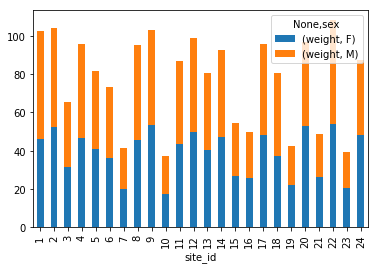

In [39]:
# Solution extra challenge 2

# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
							surveys_df["weight"] > 0.][["sex", "weight", "site_id"]]

# calculate the mean weight for each site id and sex combination:
stack_selection = stack_selection.groupby(["site_id", "sex"]).mean().unstack()

# Plot inside jupyter notebook
%matplotlib inline

# and we can make a stacked bar plot from this:
stack_selection.plot(kind='bar', stacked=True)

# Combining DataFrames with Pandas

In many “real world” situations, the data that we want to use come in multiple files. We often need to combine these files into a single DataFrame to analyze the data. The pandas package provides various methods for combining DataFrames including `merge` and `concat`.

To work through the examples below, we first need to load the species and surveys files into pandas DataFrames. Before we start, we will make sure that libraries are currectly installed. 

```python
!pip install pandas matplotlib
```

```python 
Requirement already satisfied: pandas in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (0.23.0)
Requirement already satisfied: matplotlib in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (2.2.2)
Requirement already satisfied: python-dateutil>=2.5.0 in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from pandas) (2.7.3)
Requirement already satisfied: pytz>=2011k in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from pandas) (2018.4)
Requirement already satisfied: numpy>=1.9.0 in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from pandas) (1.14.3)
Requirement already satisfied: cycler>=0.10 in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from matplotlib) (0.10.0)
Requirement already satisfied: six>=1.10 in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from matplotlib) (1.11.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from matplotlib) (2.2.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from matplotlib) (1.0.1)
Requirement already satisfied: setuptools in /Users/asha0035/.local/share/virtualenvs/python-workshop-base-LFzz33nP/lib/python3.6/site-packages (from kiwisolver>=1.0.1->matplotlib) (39.2.0)
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
```

In [1]:
import pandas as pd
surveys_df = pd.read_csv("surveys.csv",
                         keep_default_na=False, na_values=[""])
surveys_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


## Concatenating DataFrames

We can use the concat function in pandas to append either columns or rows from one DataFrame to another. Let’s grab two subsets of our data to see how this works.

In [2]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)
# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)
# Reset the index values to the second dataframe appends properly
survey_sub_last10=survey_sub_last10.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

When we concatenate DataFrames, we need to specify the axis. axis=0 tells pandas to stack the second DataFrame under the first one. It will automatically detect whether the column names are the same and will stack accordingly. axis=1 will stack the columns in the second DataFrame to the RIGHT of the first DataFrame. To stack the data vertically, we need to make sure we have the same columns and associated column format in both datasets. When we stack horizonally, we want to make sure what we are doing makes sense (ie the data are related in some way).

In [3]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)

### Row Index Values and Concat

Have a look at the `vertical_stack` dataframe? Notice anything unusual? The row indexes for the two data frames `survey_sub` and `survey_sub_last10` have been repeated. We can reindex the new dataframe using the reset_index() method.



## Writing Out Data to CSV

We can use the to_csv command to do export a DataFrame in CSV format. Note that the code below will by default save the data into the current working directory. We can save it to a different folder by adding the foldername and a slash to the file `vertical_stack.to_csv('foldername/out.csv')`. We use the ‘index=False’ so that pandas doesn’t include the index number for each line.

In [4]:
# Write DataFrame to CSV
vertical_stack.to_csv('output/out.csv', index=False)

Check out your working directory to make sure the CSV wrote out properly, and that you can open it! If you want, try to bring it back into Python to make sure it imports properly.

In [5]:
# For kicks read our output back into Python and make sure all looks good
new_output = pd.read_csv('output/out.csv', keep_default_na=False, na_values=[""])

## Challenge - Combine Data

In the data folder, there are two survey data files: survey2001.csv and survey2002.csv. Read the data into Python and combine the files to make one new data frame. Create a plot of average plot weight by year grouped by sex. Export your results as a CSV and make sure it reads back into Python properly.

## Joining DataFrames

When we concatenated our DataFrames we simply added them to each other - stacking them either vertically or side by side. Another way to combine DataFrames is to use columns in each dataset that contain common values (a common unique id). Combining DataFrames using a common field is called “joining”. The columns containing the common values are called “join key(s)”. Joining DataFrames in this way is often useful when one DataFrame is a “lookup table” containing additional data that we want to include in the other.

NOTE: This process of joining tables is similar to what we do with tables in an SQL database.

For example, the `species.csv` file that we’ve been working with is a lookup table. This table contains the genus, species and taxa code for 55 species. The species code is unique for each line. These species are identified in our survey data as well using the unique species code. Rather than adding 3 more columns for the genus, species and taxa to each of the 35,549 line Survey data table, we can maintain the shorter table with the species information. When we want to access that information, we can create a query that joins the additional columns of information to the Survey data.

Storing data in this way has many benefits including:

 1. It ensures consistency in the spelling of species attributes (genus, species and taxa) given each species is only entered once. Imagine the possibilities for spelling errors when entering the genus and species thousands of times!
 2. It also makes it easy for us to make changes to the species information once without having to find each instance of it in the larger survey data.
 3. It optimizes the size of our data.

### Joining Two DataFrames

To better understand joins, let’s grab the first 10 lines of our data as a subset to work with. We’ll use the `.head` method to do this. We’ll also read in a subset of the species table.

In [6]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

### Download speciesSubset.csv file from web
import urllib.request

url = 'https://bit.ly/2DfqN6C'


urllib.request.urlretrieve(url, 'speciesSubset.csv')

# Import a small subset of the species data designed for this part of the lesson.
# It is stored in the data folder.
species_sub = pd.read_csv('speciesSubset.csv', keep_default_na=False, na_values=[""])

In this example, `species_sub` is the lookup table containing genus, species, and taxa names that we want to join with the data in `survey_sub` to produce a new DataFrame that contains all of the columns from both `species_df` and `survey_df`

In [7]:
species_sub.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [8]:
survey_sub.columns

Index(['record_id', 'month', 'day', 'year', 'site_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In our example, the join key is the column containing the two-letter species identifier, which is called `species_id`.

Now that we know the fields with the common species ID attributes in each DataFrame, we are almost ready to join our data. However, since there are **different types of joins**, we also need to decide which type of join makes sense for our analysis.

### Inner Joins

The most common type of join is called an *inner join*. An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains only those rows that have matching values in both of the original DataFrames.

Inner joins yield a DataFrame that contains only rows where the value being joins exists in BOTH tables. An example of an inner join, adapted from [this page](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/) is below:

![inner join](images/inner-join.png)

The pandas function for performing joins is called `merge` and an Inner join is the default option:

In [9]:
merged_inner = pd.merge(left=survey_sub,right=species_sub, left_on='species_id', right_on='species_id')
# In this case `species_id` is the only column name in  both dataframes, so if we skippd `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner.shape
merged_inner

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


The result of an inner join of `survey_sub` and `species_sub` is a new DataFrame that contains the combined set of columns from `survey_sub` and `species_sub`. It only contains rows that have two-letter species codes that are the same in both the `survey_sub` and `species_sub` DataFrames. In other words, if a row in `survey_sub` has a value of `species_id` that does not appear in the `species_id` column of `species`, it will not be included in the DataFrame returned by an inner join. Similarly, if a row in `species_sub` has a value of `species_id` that does not appear in the `species_id` column of `survey_sub`, that row will not be included in the DataFrame returned by an **inner join**.

The two DataFrames that we want to join are passed to the `merge` function using the left and right argument. The `left_on='species'` argument tells `merge` to use the `species_id` column as the join key from `survey_sub` (the left DataFrame). Similarly , the `right_on='species_id'` argument tells merge to use the `species_id` column as the join key from `species_sub` (the right DataFrame). For inner joins, the order of the left and right arguments does not matter.

The result `merged_inner` DataFrame contains all of the columns from `survey_sub` (record id, month, day, etc.) as well as all the columns from species_sub (species_id, genus, species, and taxa).

Notice that `merged_inner` has fewer rows than `survey_sub`. This is an indication that there were rows in `surveys_df` with value(s) for species_id that do not exist as value(s) for `species_id` in `species_df`.



### Left Joins

What if we want to add information from `species_sub` to `survey_sub` without losing any of the information from `survey_sub`? In this case, we use a different type of join called a “left outer join”, or a “left join”.

Like an inner join, a left join uses join keys to combine two DataFrames. Unlike an inner join, a left join will return *all* of the rows from the `left` DataFrame, even those rows whose join key(s) do not have values in the `right` DataFrame. Rows in the left DataFrame that are missing values for the join key(s) in the `right` DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the `right` DataFrame that do not have values for the join key(s) in the `left` DataFrame.

![left join](images/left_join.png)

A left join is performed in pandas by calling the same `merge` function used for inner join, but using the `how='left'` argument:

In [10]:
merged_left = pd.merge(left=survey_sub,right=species_sub, how='left', left_on='species_id', right_on='species_id')

merged_left


,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


The result DataFrame from a left join (`merged_left`) looks very much like the result DataFrame from an inner join (`merged_inner`) in terms of the columns it contains. However, unlike `merged_inner`, merged_left contains the same number of rows as the original `survey_sub` DataFrame. When we inspect `merged_left`, we find there are rows where the information that should have come from `species_sub (i.e., species_id, genus, and taxa)` is missing (they contain NaN values):

In [11]:
merged_left[ pd.isnull(merged_left.genus) ]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


These rows are the ones where the value of `species_id` from `survey_sub` (in this case, PF) does not occur in `species_sub`.

### Other join types

The pandas merge function supports two other join types:

 - Right (outer) join: Invoked by passing `how='right'` as an argument. Similar to a left join, except all rows from the `right` DataFrame are kept, while rows from the left DataFrame without matching join key(s) values are discarded.
 - Full (outer) join: Invoked by passing `how='outer'` as an argument. This join type returns the all pairwise combinations of rows from both DataFrames; i.e., the result DataFrame will `NaN` where data is missing in one of the dataframes. This join type is very rarely used.


## Extra Challenge 1

Create a new DataFrame by joining the contents of the `surveys.csv` and `speciesSubset.csv` tables. Then calculate and plot the distribution of:

 1. taxa by plot
 2. taxa by sex by plot